# Hyperparameter Optimization For Xgboost on Cancer-Genome Dataset

In [251]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
import pandas as pd
import numpy as np

# Step 1: Read the dataset:
Train = pd.read_csv('Original_data/Train_Set.csv')
Test = pd.read_csv("Original_data/Test_Set.csv")
X_train = Train.iloc[:,0:-1]
X_test = Test.iloc[:,0:-1]
y_train = Train.iloc[:,-1]
le = LabelEncoder().fit(y = y_train)
y_train = le.transform(y_train)
y_test = Test.iloc[:,-1]

# Step 2: Define parameter grid for Hyperparameter optimization:
parameters={
 'n_estimators'     : [250, 500, 1000], #Amount of trees
 "learning_rate"    : [0.001, 0.01, 0.05, 0.15, 0.25, 0.35 ] , # How much do the model update its residuals learn from each trees miscalculation
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15], # What is the highest amount of nodes on a tree, goes high as there is a lot of parameters
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ], # Minimum loss reduction required to make a split.
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7] #How big a precentage of columns are sampled for each tree
}

# Step 3: Instantiate XGBoost Classifier
model = xgb.XGBClassifier(
 min_child_weight=1,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi: softmax',
 num_class = 5,
 seed=27)

# Step 4: Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=parameters, n_iter=20, cv=5,scoring='roc_auc_ovr', random_state=42)


In [252]:
# Step 5: Fit the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions=le.inverse_transform(predictions)
Test['Predictions'] = predictions
Test[1:5]

,length_51,length_52,length_53,length_54,length_55,length_56,length_57,length_58,length_59,length_60,...,length_393,length_394,length_395,length_396,length_397,length_398,length_399,length_400,class_label,Predictions
1,0.005132,0.004886,0.004952,0.005123,0.005237,0.005530,0.006147,0.006655,0.007607,0.008042,...,0.009324,0.009207,0.008628,0.008210,0.007823,0.007412,0.007054,0.006992,healthy,screening stage cancer
2,0.006114,0.005463,0.005444,0.005369,0.005425,0.005897,0.006341,0.007238,0.008696,0.008772,...,0.018711,0.017700,0.017124,0.016344,0.015406,0.014876,0.014111,0.013640,healthy,early stage cancer
3,0.000158,0.000089,0.000085,0.000097,0.000107,0.000142,0.000141,0.000184,0.000206,0.000189,...,0.006362,0.006070,0.005884,0.005488,0.005127,0.004942,0.004801,0.004483,healthy,healthy
4,0.000215,0.000116,0.000129,0.000144,0.000160,0.000186,0.000224,0.000226,0.000345,0.000321,...,0.004640,0.004561,0.004232,0.003967,0.003795,0.003561,0.003568,0.003286,healthy,screening stage cancer


In [253]:
Test['Correct_prediction'] = Test['class_label'] == Test['Predictions']
print(f"Mean amount of correct predictions: {Test['Correct_prediction'].mean()}")

Mean amount of correct predictions: 0.6499032882011605


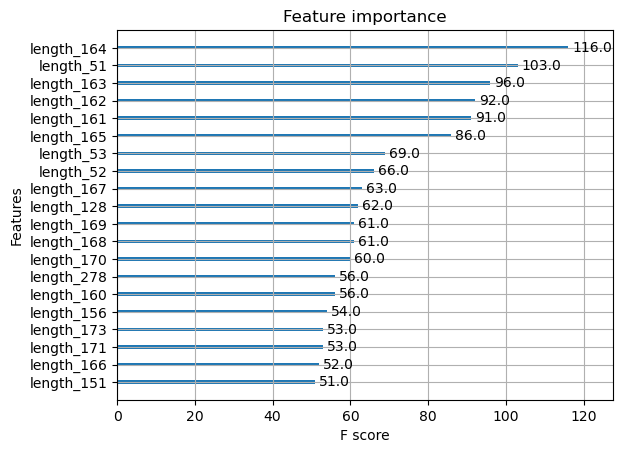

In [254]:
xgb.plot_importance(model,max_num_features=20)
plt.show()

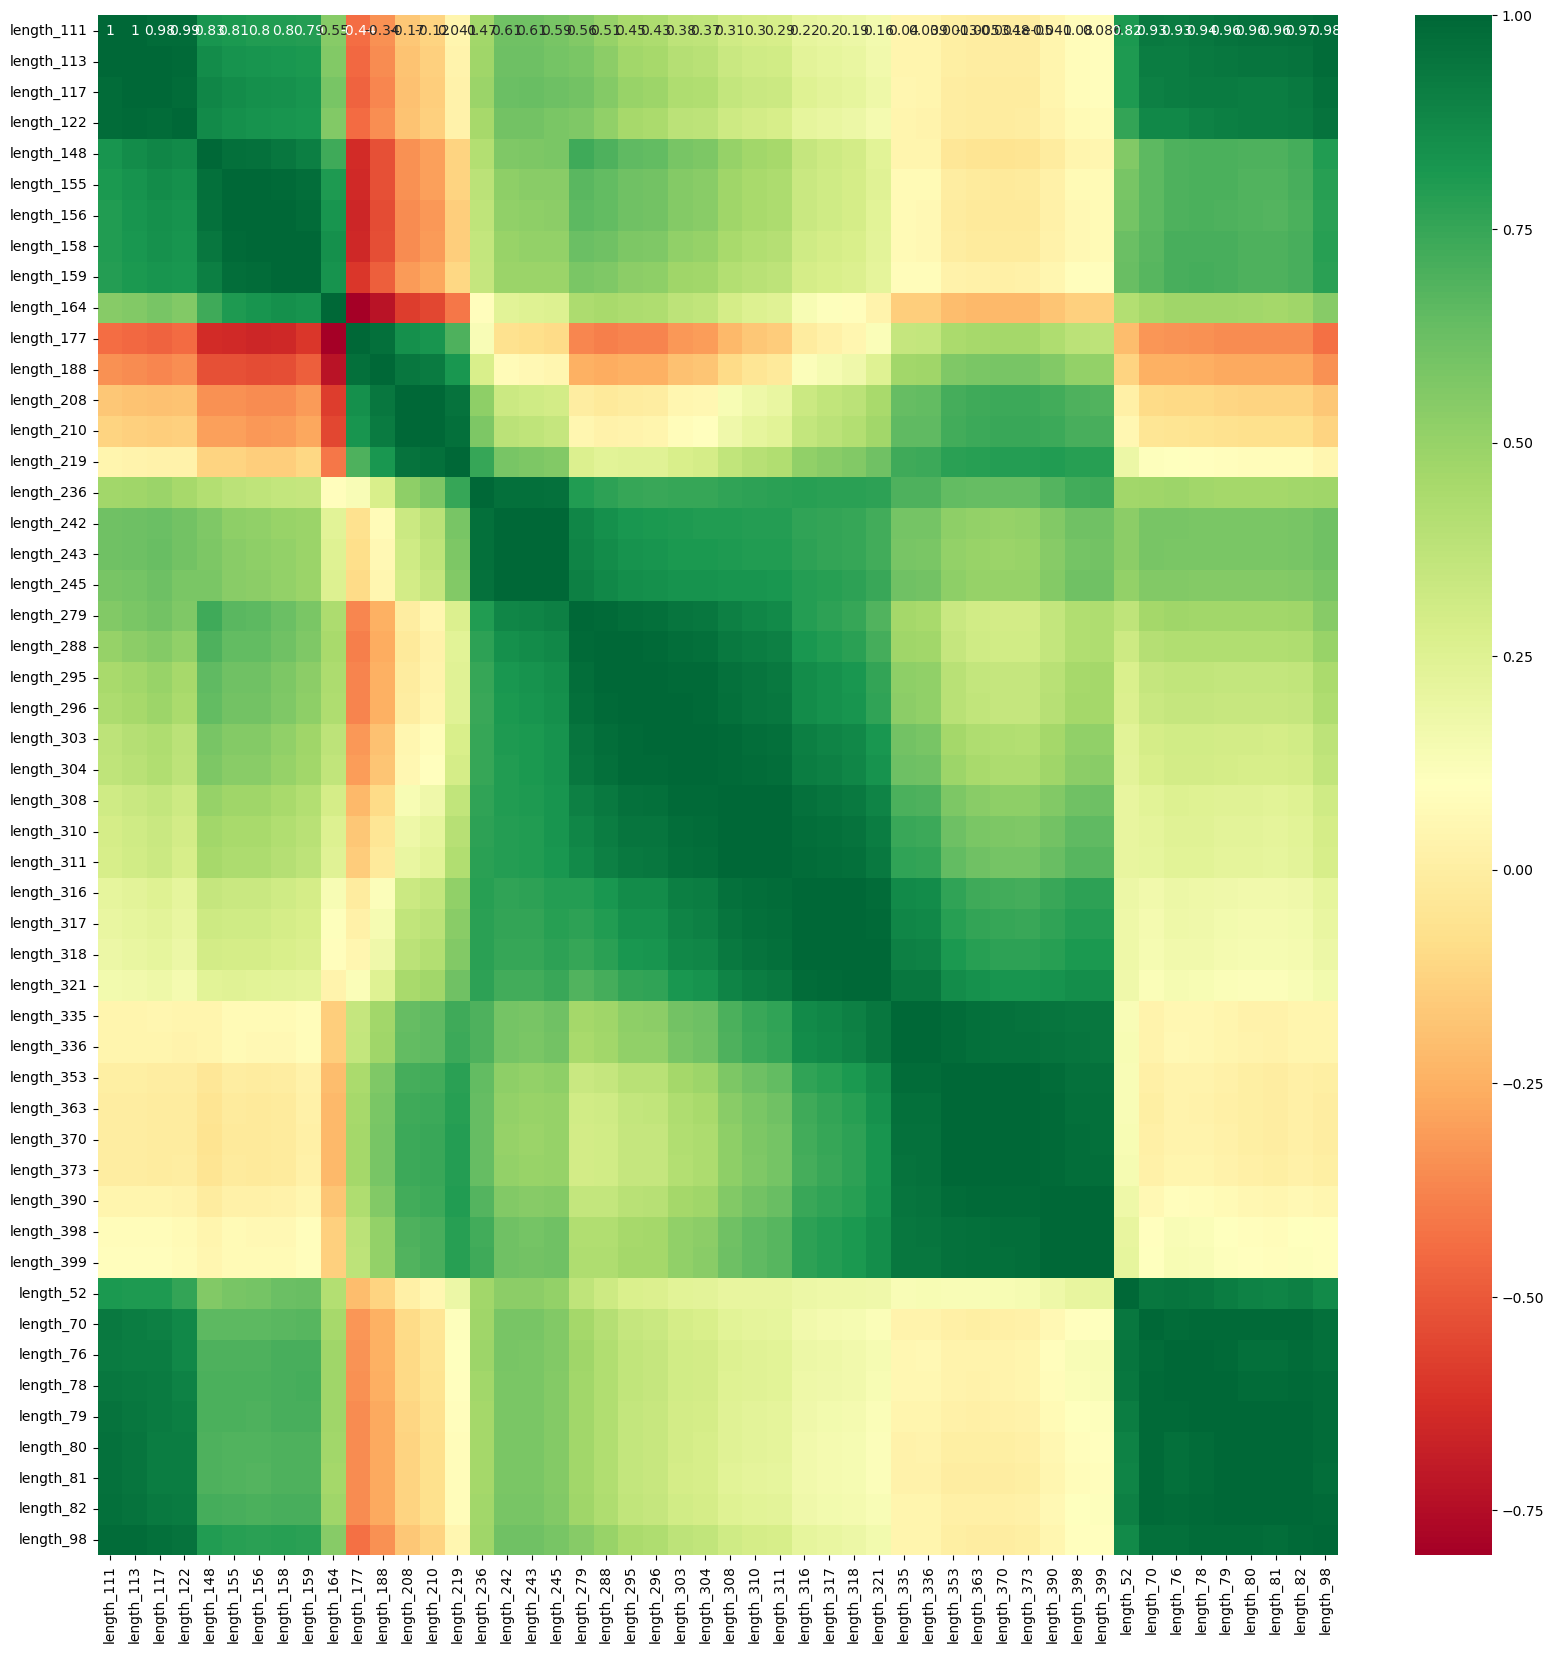

In [255]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = Train.iloc[:,:-1].sample(n=50, axis='columns')
corrmat = corrmat[sorted(corrmat.columns)]
corrmat = corrmat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [256]:
random_search.fit(X_train, y_train)
# Step 6: Evaluate the model
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)

In [264]:
from sklearn.model_selection import cross_val_score
random_search
best_model
#score=cross_val_score(xgboost,X,Y_mapped,cv=10)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [267]:
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)
predictions=le.inverse_transform(predictions)
Test['Predictions'] = predictions


In [268]:
Test['Correct_prediction'] = Test['class_label'] == Test['Predictions']
print(f"Mean amount of correct predictions: {Test['Correct_prediction'].mean()}")

Mean amount of correct predictions: 0.6818181818181818


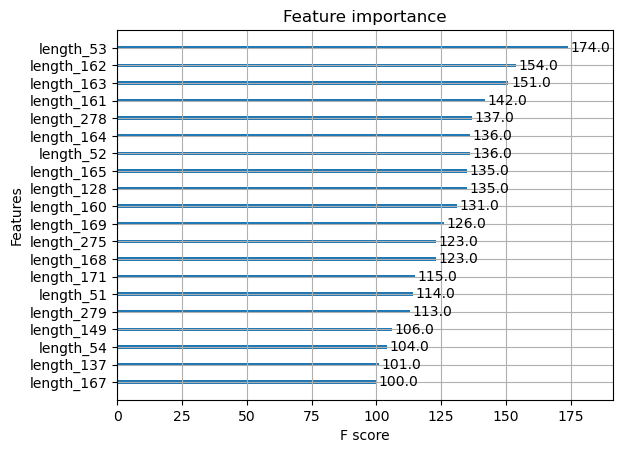

In [269]:
xgb.plot_importance(best_model,max_num_features=20)
plt.show()